In [86]:
library(dplyr)

In [50]:
dat <- read.csv("../dagdata/inst/extdata/femaleMiceWeights.csv")

In [51]:
head(dat)

,Diet,Bodyweight
,<chr>,<dbl>
1,chow,21.51
2,chow,28.14
3,chow,24.04
4,chow,23.45
5,chow,23.68
6,chow,19.79


In [52]:
control <- filter(dat, Diet=="chow") %>% select(Bodyweight) %>% unlist
control

Bodyweight1  Bodyweight2  Bodyweight3  Bodyweight4  Bodyweight5  Bodyweight6 
       21.51        28.14        24.04        23.45        23.68        19.79 
 Bodyweight7  Bodyweight8  Bodyweight9 Bodyweight10 Bodyweight11 Bodyweight12 
       28.40        20.98        22.51        20.10        26.91        26.25

In [53]:
treatment <- filter(dat, Diet=="hf") %>% select(Bodyweight) %>% unlist
treatment

Bodyweight1  Bodyweight2  Bodyweight3  Bodyweight4  Bodyweight5  Bodyweight6 
       25.71        26.37        22.80        25.34        24.97        28.14 
 Bodyweight7  Bodyweight8  Bodyweight9 Bodyweight10 Bodyweight11 Bodyweight12 
       29.58        30.92        34.02        21.90        31.53        20.73

In [54]:
mean(treatment)

[1] 26.83417

In [55]:
mean(control)

[1] 23.81333

In [56]:
mean(treatment) -mean(control)

[1] 3.020833

In [57]:
population <- read.csv("../dagdata/inst/extdata/femaleControlsPopulation.csv")
head(population)

,Bodyweight
,<dbl>
1,27.03
2,24.80
3,27.02
4,28.07
5,23.55
6,22.72


In [58]:
population <- unlist(population)

In [59]:
length(population)

[1] 225

In [60]:
sample(population, 12)

Bodyweight96 Bodyweight164  Bodyweight14 Bodyweight147 Bodyweight208 
        16.82         23.32         20.10         22.56         28.21 
 Bodyweight24  Bodyweight58  Bodyweight80 Bodyweight122   Bodyweight1 
        25.27         22.00         27.36         23.51         27.03 
Bodyweight197 Bodyweight105 
        27.70         23.70

In [61]:
mean(sample(population, 12))

[1] 25.64833

In [62]:
obs <- mean(treatment) - mean(control)

In [63]:
population <- read.csv("../dagdata/inst/extdata/femaleControlsPopulation.csv")

In [64]:
population <- unlist(population)

In [65]:
n <- 10000

nulls <- vector("numeric", n)
for(i in 1:n) {
    control <- sample(population, 12)
    treatment <- sample(population, 12)

    nulls[i] <- mean(treatment) - mean(control)
}

In [66]:
max(nulls)

[1] 5.279167

In [67]:
min(nulls)

[1] -5.14

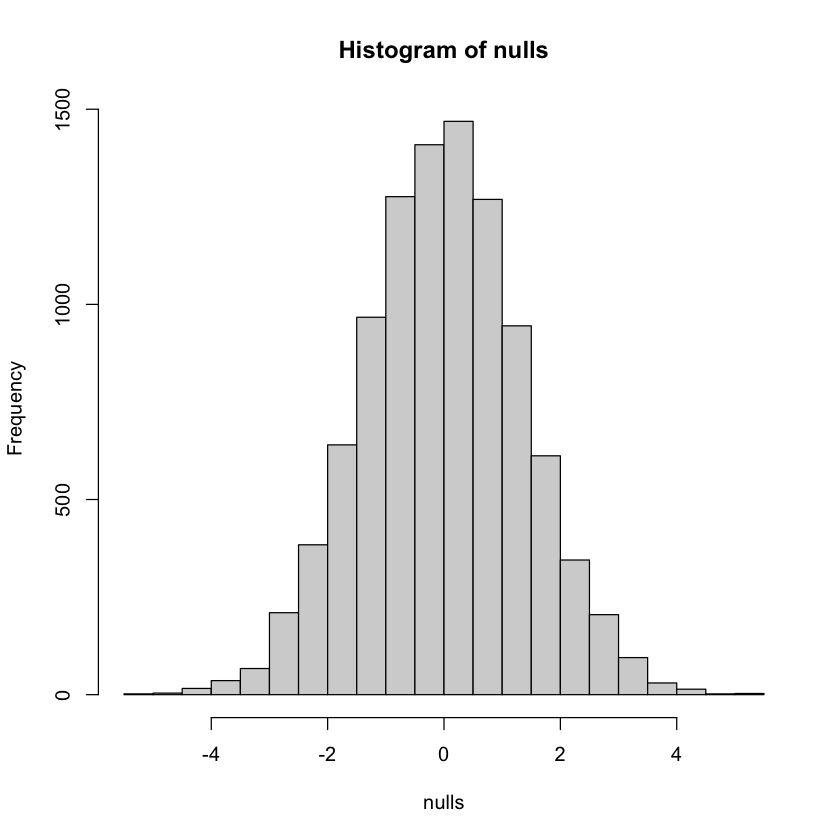

In [68]:
hist(nulls)

In [69]:
#sum(nulls > obs) / n

# or

mean(nulls > obs)

[1] 0.0139

In [70]:
mean(abs(nulls) > obs) # P value

[1] 0.026

# CLT in practice

In [71]:
library(rafalib)

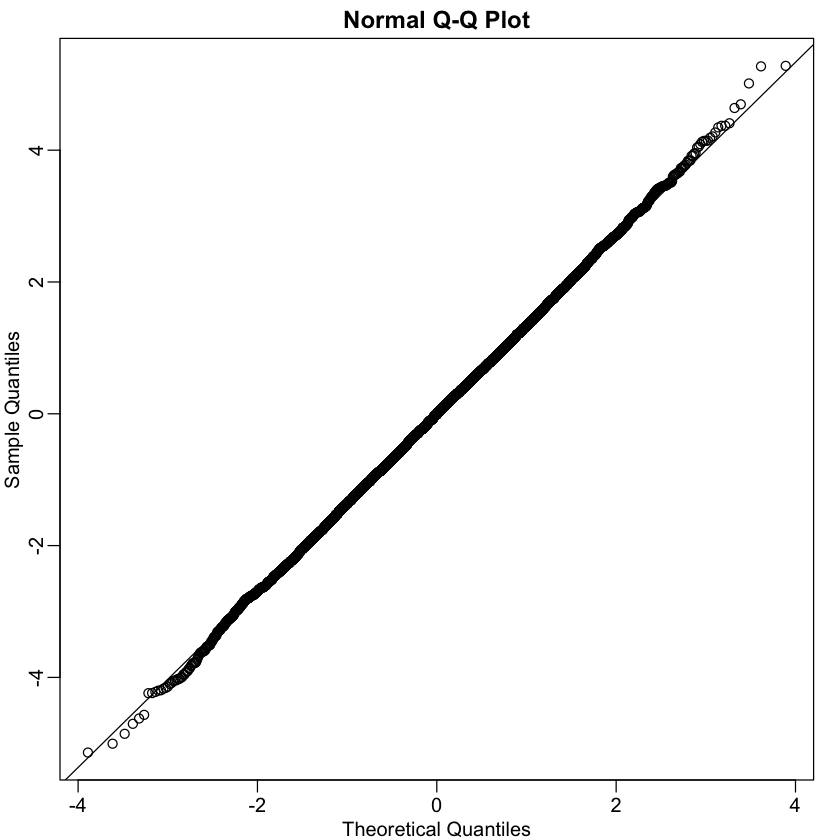

In [72]:
mypar()

qqnorm(nulls)
qqline(nulls)

# T-tests

In [73]:
# Standard error
N <- length(treatment)
se <- sqrt(var(treatment)/N + var(control)/N)
tstat <- obs/se

In [74]:
tstat

[1] 2.243817

In [75]:
2*(1 - pnorm(tstat))

[1] 0.02484421

In [83]:
n <- 10000
nulls <- vector("numeric", n)
for(i in 1:n) {
    control <- sample(population,3)
    treatment <- sample(population, 3)
    se <- sqrt(var(treatment)/3 + var(control)/3)
    nulls[i] <- (mean(treatment) - mean(control))/se
}

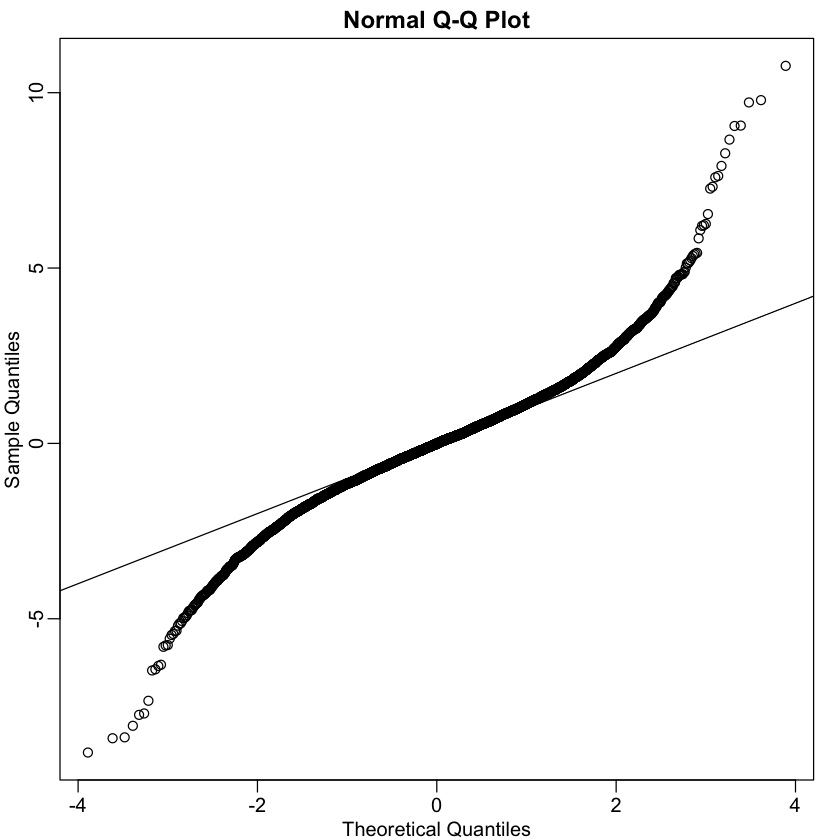

In [84]:
mypar()
qqnorm(nulls)
abline(0,1)

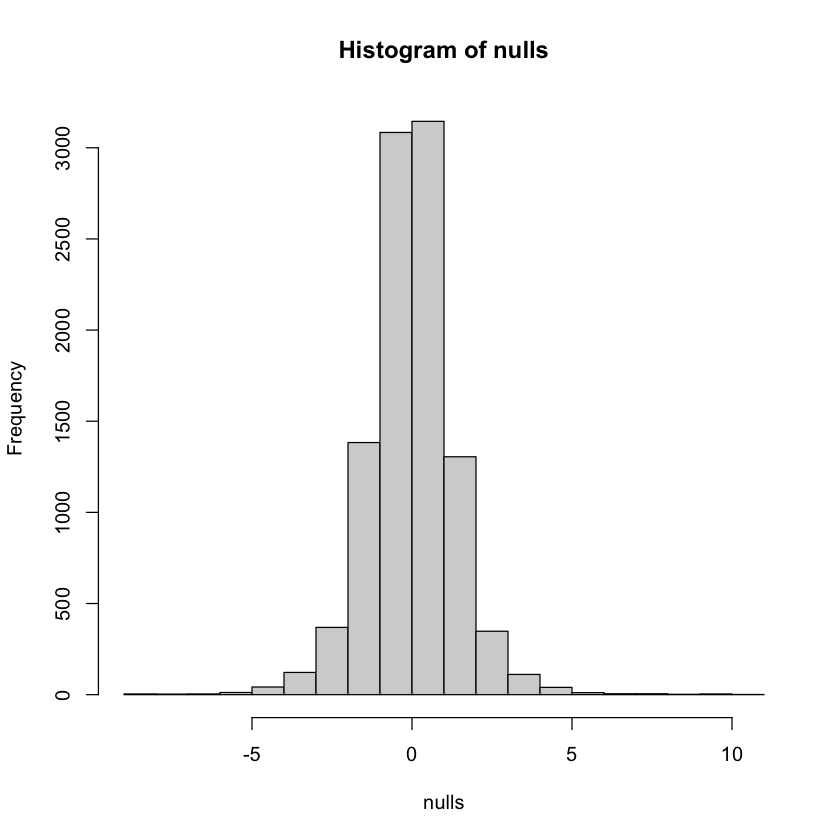

In [85]:
hist(nulls)

# T test II

In [88]:
library(dplyr)

In [89]:
dat <- read.csv('../dagdata/inst/extdata/femaleMiceWeights.csv')

In [90]:
control <- filter(dat, Diet=="chow") %>% select(Bodyweight) %>% unlist
treatment <- filter(dat, Diet=="hf") %>% select(Bodyweight) %>% unlist

In [92]:
ttest <- t.test(treatment, control)

In [93]:
ttest


	Welch Two Sample t-test

data:  treatment and control
t = 2.0552, df = 20.236, p-value = 0.053
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04296563  6.08463229
sample estimates:
mean of x mean of y 
 26.83417  23.81333 


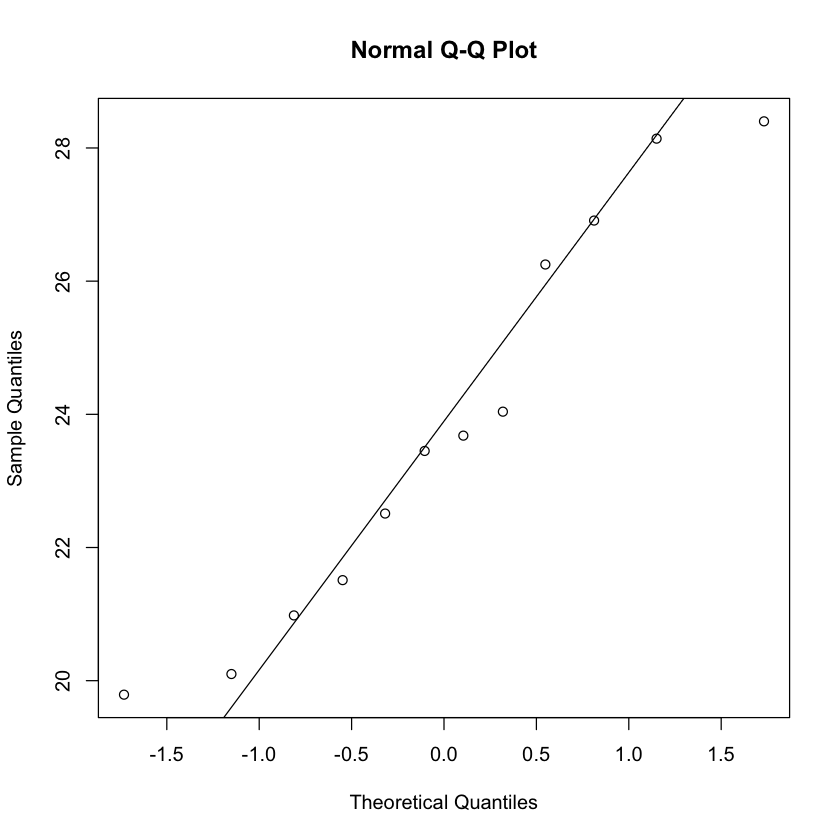

In [94]:
qqnorm(control)
qqline(control)

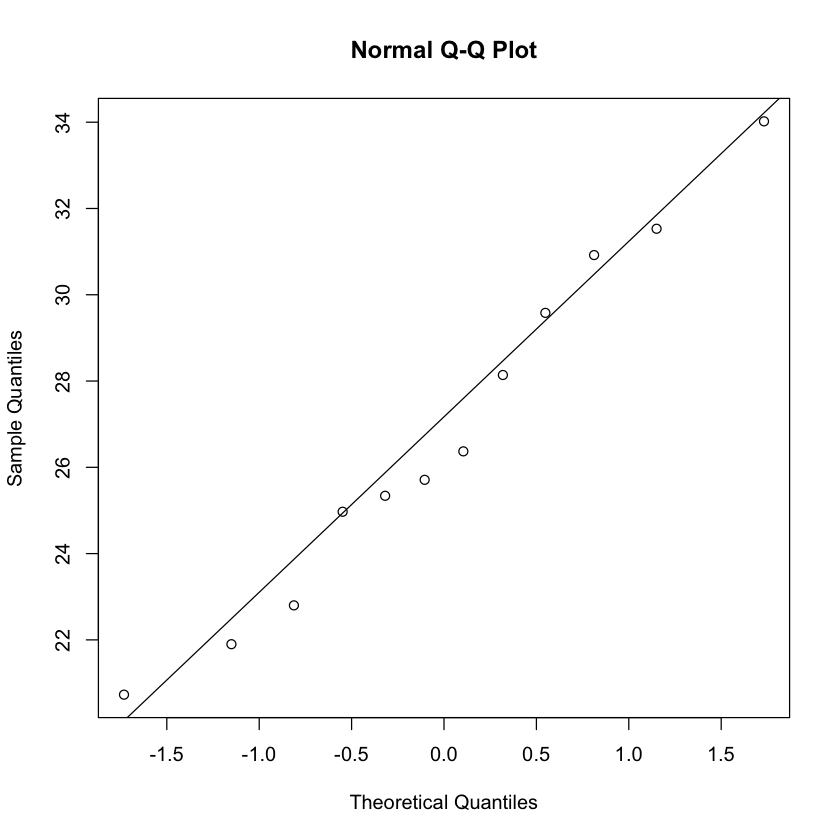

In [95]:
qqnorm(treatment)
qqline(treatment)